In [1]:
machine = 'mac'
machine = 'magny'


In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import copy

from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind

from auriga_basics import *
%matplotlib inline

In [3]:
level = 4
if machine == 'magny':
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
elif machine == 'mac': 
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
j = 0
for halo_number in [24]:  # range(1, 31):
    halodir = basedir+"halo_{0}/".format(halo_number)
    snappath = halodir+"output/"
    for snapnr in range(127,128,1):
        print("level   : {0}".format(level))
        print("halo    : {0}".format(halo_number))
        print("snapnr  : {0}".format(snapnr))
        print("basedir : {0}".format(basedir))
        print("halodir : {0}".format(halodir))
        print("snappath: {0}\n".format(snappath))
        s, sf = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[0,1,2,3,4,5], 
            haloid=0, galradfac=0.1, verbose=True, rotate_disk=True, use_principal_axis=True, 
            euler_rotation=False,  use_cold_gas_spin=False, do_rotation=True) 

        s2, sf2 = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[0,1,2,3,4,5], 
            haloid=0, galradfac=0.1, verbose=True, rotate_disk=False, use_principal_axis=False, 
            euler_rotation=False,  use_cold_gas_spin=False, do_rotation=False) 
        
        # Clean negative and zero values of gmet to avoid RuntimeErrors
        # later on (e.g. dividing by zero)
        s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 )
        s2.data['gmet'] = np.maximum( s2.data['gmet'], 1e-40 )

level   : 4
halo    : 24
snapnr  : 127
basedir : /hits/universe/GigaGalaxy/level4_MHD/
halodir : /hits/universe/GigaGalaxy/level4_MHD/halo_24/
snappath: /hits/universe/GigaGalaxy/level4_MHD/halo_24/output/

[ 34.42281723  33.16259384  37.29567337]
Found 1783163 stars.
Rotated pos.
Rotated bfld.
Rotated vel.

galrad  : 0.02408556640148163
redshift: 2.220446049250313e-16
time    : 0.9999999999999998
center  : [ 0.  0.  0.]

[ 34.42281723  33.16259384  37.29567337]

galrad  : 0.02408556640148163
redshift: 2.220446049250313e-16
time    : 0.9999999999999998
center  : [ 0.  0.  0.]



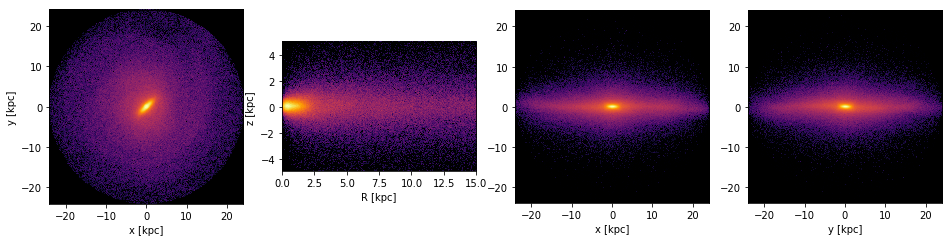

In [4]:
cmap = copy.copy(plt.cm.inferno)
cmap.set_bad((0,0,0))  # Fill background with black

istars, = np.where( (s.halo == 0) & (s.subhalo == 0) & (s.type == 4) & (s.r() < s.galrad) ) #(s.type == 4) & 
(x_kpc, y_kpc, z_kpc), (vx, vy, vz), rxyz_kpc, rxy_kpc = get_cartesian_vectors(s, sf, istars)
(R_kpc, phi, z_kpc), (vR, vphi, vz) = get_cylindrical_vectors(s, sf, istars)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 6))
ax1.hist2d(x_kpc, y_kpc, bins=401, norm=matplotlib.colors.LogNorm(), cmap = cmap)
ax1.set_xlabel("x [kpc]")
ax1.set_ylabel("y [kpc]")
ax1.set_aspect('equal')
ax2.hist2d(rxy_kpc, z_kpc, bins=401, norm=matplotlib.colors.LogNorm(), cmap = cmap, range =  [[0, 15], [-5, 5]])
ax2.set_xlabel("R [kpc]")
ax2.set_ylabel("z [kpc]")
ax2.set_aspect('equal')
ax3.hist2d(x_kpc, z_kpc, bins=401, norm=matplotlib.colors.LogNorm(), cmap = cmap)
ax3.set_xlabel("x [kpc]")
#ax3.set_ylabel("z")
ax3.set_aspect('equal')
ax4.hist2d(y_kpc, z_kpc, bins=401, norm=matplotlib.colors.LogNorm(), cmap = cmap)
ax4.set_xlabel("y [kpc]")
#ax4.set_ylabel("z")
ax4.set_aspect('equal')
#fig.show()
#fig.savefig('../plots/distribution.png',  dpi = 300, format = 'png', bbox_inches = 'tight')

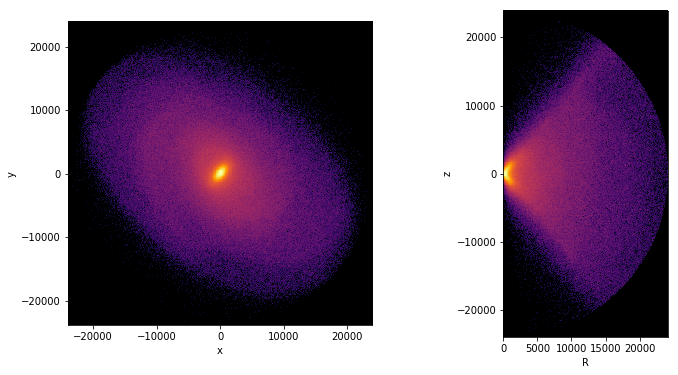

In [5]:
istars2, = np.where( (s2.type == 4) & (s2.halo == 0) & (s2.subhalo == 0) & (s2.r() < s2.galrad) )#(s2.type == 4) &
(x2, y2, z2), (vx2, vy2, vz2), rxyz2, rxy2 = get_cartesian_vectors(s2, sf2, istars2)
(R2, phi2, z2), (vR2, vphi2, vz2) = get_cylindrical_vectors(s2, sf2, istars2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist2d(1000*x2, 1000*y2, bins=401, norm=matplotlib.colors.LogNorm(), cmap = cmap)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_aspect('equal')
ax2.hist2d(1000*rxy2, 1000*z2, bins=401, norm=matplotlib.colors.LogNorm(), cmap = cmap)
ax2.set_xlabel("R")
ax2.set_ylabel("z")
ax2.set_aspect('equal')
#fig.show()

In [6]:
def cm(m,i):
    cm = np.sum(m*i)/np.sum(m)
    return(cm)

def cm_frame(x, y, z, vx, vy, vz, m):
    cmx, cmy, cmz = cm(m, x), cm(m, y), cm(m, z)
    cmvx, cmvy, cmvz = cm(m, vx), cm(m, vy), cm(m, vz)
    
    xn, yn, zn = x - cmx, y - cmy, z - cmz
    vxn, vyn, vzn = vx - cmvx, vy - cmvy, vz - cmvz
    return (cmx, cmy, cmz), (cmvx, cmvy, cmvz), (xn, yn, zn), (vxn, vyn, vzn)

def momentum(m, vx, vy, vz):
    px, py, pz = m*vx, m*vy, m*vz
    return(px, py, pz)

def ang_mom(x, y, z, px, py, pz):
    Lx = np.sum(y * pz - z * py)
    Ly = np.sum(z * px - x * pz)
    Lz = np.sum(x * py - y * px)
    print('angular momentum:\n', Lx, Ly, Lz)
    return(Lx, Ly, Lz)

def mom_inertia(m, x, y, z):
    Ixx = np.sum(m * (y**2 + z**2))
    Iyy = np.sum(m * (z**2 + x**2))
    Izz = np.sum(m * (x**2 + y**2))
    Ixy = - np.sum(m * x * y) 
    Iyz = - np.sum(m * y * z)
    Ixz = - np.sum(m * x * z)
    print('moment of inertia tensor:\n', Ixx, Ixy, Ixz, '\n', Ixy, Iyy, Iyz, '\n', Ixz, Iyz, Izz)
    #return(Ixx, Iy, Iz)

In [7]:
# MASKS
iall, = np.where( (s.r() < s.galrad) & (s.r() > 0.) )
igas, = np.where( (s.r() < s.galrad) & (s.r() > 0.) & (s.type == 0) )
idm, = np.where( (s.r() < s.galrad) & (s.r() > 0.) & ((s.type == 1) + (s.type == 2) + (s.type == 3) ))
istars, = np.where( (s.r() < s.galrad) & (s.r() > 0.) & (s.type == 4) )#& (age > 0.) )

istars0, = np.where( (s.type == 4) & (s.halo == 0) & (s.r() > 0.) & (s.r() < s.galrad) )

In [13]:
masks = [igas, idm, istars, iall]
maskname = ['gas', 'DM', 'stars', 'all']
for i, mask in enumerate(masks):
    (x_kpc, y_kpc, z_kpc), (vx_kms, vy_kms, vz_kms), rxyz_kpc, rxy_kpc = get_cartesian_vectors(s, sf, mask)
    m = s.mass[mask]
    (cmx, cmy, cmz), (cmvx, cmvy, cmvz), (xn, yn, zn), (vxn, vyn, vzn) = cm_frame(x_kpc, y_kpc, z_kpc, vx_kms, vy_kms, vz_kms, m)
    px, py, pz = momentum(m, vx_kms, vy_kms, vz_kms)
    pxn, pyn, pzn = momentum(m, vxn, vyn, vzn)
    print('\n' + maskname[i])
    print('\nrotated snapshot output\n')
    Lx, Ly, Lz = ang_mom(x_kpc, y_kpc, z_kpc, px, py, pz)
    print('\n')
    mom_inertia(m, x_kpc, y_kpc, z_kpc)
    '''
    print('\nrotated with COM correction\n')
    Lxn, Lyn, Lzn = ang_mom(xn, yn, zn, pxn, pyn, pzn)
    mom_inertia(m, xn, yn, zn)
    '''


gas

rotated snapshot output

angular momentum:
 -15162.5 -6702.27 -4.08542e+06


moment of inertia tensor:
 177.34 5.44666 1.89073 
 5.44666 180.406 0.385896 
 1.89073 0.385896 340.019

DM

rotated snapshot output

angular momentum:
 42144.5 -348469.0 -2.90143e+06


moment of inertia tensor:
 2648.02 11.8582 -6.33367 
 11.8582 2662.13 5.96677 
 -6.33367 5.96677 3161.08

stars

rotated snapshot output

angular momentum:
 59240.7 -69347.6 -7.7244e+06


moment of inertia tensor:
 357.962 2.71499e-05 2.4505e-05 
 2.71499e-05 382.186 4.85033e-06 
 2.4505e-05 4.85033e-06 660.372

all

rotated snapshot output

angular momentum:
 86221.4 -424517.0 -1.47113e+07


moment of inertia tensor:
 3183.32 17.3049 -4.44296 
 17.3049 3224.72 6.35263 
 -4.44296 6.35263 4161.47


In [8]:
m = s.mass[mask] # in [10^10 Msun]
m2 = s2.mass[mask]
(cmx, cmy, cmz), (cmvx, cmvy, cmvz), (xn, yn, zn), (vxn, vyn, vzn) = cm_frame(x_kpc, y_kpc, z_kpc, vx, vy, vz, m)
#(cmx2, cmy2, cmz2), (cmvx2, cmvy2, cmvz2), (xn2, yn2, zn2), (vxn2, vyn2, vzn2) = cm_frame(x2, y2, z2, vx2, vy2, vz2, m2)

px, py, pz = momentum(m, vx, vy, vz)
#px2, py2, pz2 = momentum(m2, vx2, vy2, vz2)
pxn, pyn, pzn = momentum(m, vxn, vyn, vzn)
#pxn2, pyn2, pzn2 = momentum(m2, vxn2, vyn2, vzn2)


print('\nrotated snapshot output\n')
Lx, Ly, Lz = ang_mom(x_kpc, y_kpc, z_kpc, px, py, pz)
mom_inertia(m, x_kpc, y_kpc, z_kpc)
print('\nrotated with COM correction\n')
Lxn, Lyn, Lzn = ang_mom(xn, yn, zn, pxn, pyn, pzn)
mom_inertia(m, xn, yn, zn)
'''
print('\nunrotated snapshot output\n')
Lx2, Ly2, Lz2 = ang_mom(x2, y2, z2, px2, py2, pz2)
mom_inertia(m2, x2, y2, z2)
print('\nunrotated with COM correction\n')
Lxn2, Lyn2, Lzn2 = ang_mom(xn2, yn2, zn2, pxn2, pyn2, pzn2)
mom_inertia(m2, xn2, yn2, zn2)
'''
#print(Lx, Ly, Lz, '\n', Lxn, Lyn, Lzn, '\n\n', Lx2, Ly2, Lz2, '\n', Lxn2, Lyn2, Lzn2, '\n')
#print(Ix, Iy, Iz, '\n', Ixn, Iyn, Izn, '\n', '\n', Ix2, Iy2, Iz2, '\n',Ixn2, Iyn2, Izn2)


rotated snapshot output

angular momentum:
 59993.5 -68891.0 -7.69612e+06
moment of inertia tensor:
 357.392 -0.00636995 -0.00706135 
 -0.00636995 381.6 0.000294298 
 -0.00706135 0.000294298 659.225

rotated with COM correction

angular momentum:
 59795.5 -68596.7 -7.69606e+06
moment of inertia tensor:
 357.375 0.0169089 -0.0111966 
 0.0169089 381.566 -0.00260092 
 -0.0111966 -0.00260092 659.175

unrotated snapshot output

angular momentum:
 -3.8864e+06 -4.66072e+06 -4.73416e+06
moment of inertia tensor:
 433.729 86.2543 95.8988 
 86.2543 485.833 103.41 
 95.8988 103.41 478.654

unrotated with COM correction

angular momentum:
 -3.88612e+06 -4.66093e+06 -4.73407e+06
moment of inertia tensor:
 433.694 86.2663 95.8792 
 86.2663 485.792 103.394 
 95.8792 103.394 478.63
